## BASIC IMPORTS

In [9]:
from TBAC  import StockScrub, VIX_update                      #This line tells python to import the class.
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np                     
from dotenv import load_dotenv 
%matplotlib inline
#!pip install newspaper3k                                     
from GoogleNews import GoogleNews
from newspaper import Article
from datetime import datetime
import numpy as np


### Creating Objects of the StockScrub Class

In [3]:
apple=StockScrub(['AAPL'])

### Pulls in most recent available data AlphaVantage API for a single ticker representing permitted stock or cryptocurrency

In [4]:
#apple.get_data()

### Pulls in most recent available data on VIX indicator from Quandl API to be used for analysis

In [5]:
#VIX_update()

# Preliminary Results of Getting Sentiment for Specified Stock 
### *(Don't have articles for each day,presents a challenge for gathering sentiment. Either improve search query or consider all sources and remove days that don't have news)*
### -Takes news from GoogleNews API, combines news on same day and removes duplicated days
### -tokenizes content for sentiment computation
### -The contents column will be the column that contains the sentiment scores

In [6]:
apple.get_sentiment()

,site,content
2020-06-22,apple newsroom,"[APPLE, INTRODUCES, MACOS, BIG, SUR, WITH, A, ..."
2020-07-21,apple newsroom,"[APPLE, COMMITS, TO, BE, PERCENT, CARBON, NEUT..."
2020-08-04,apple newsroom,"[INCH, IMAC, GETS, A, MAJOR, UPDATE, APPLE, TO..."
2020-08-13,raleigh news & observer,"[EPIC, GAMES, FILES, LAWSUIT, AGAINST, APPLE, ..."
2020-09-15,apple newsroom,"[APPLE, ONE, MAKES, ENJOYING, APPLE, SUBSCRIPT..."
2020-09-17,apple newsroom,"[APPLE, BRINGS, ONLINE, STORE, TO, INDIA, SEPT..."
2020-10-13,apple newsroom,"[APPLE, ANNOUNCES, IPHONE, AND, IPHONE, MINI, ..."
2020-10-21,apple newsroom,"[APPLE, OFFERS, NEW, WAYS, TO, SHOP, FOR, IPHO..."
2020-10-30,macrumors,"[APPLE, ONE, WHAT, YOU, NEED, TO, KNOW, APPLE,..."
2020-11-05,apple newsroom,"[IPHONE, PRO, MAX, IPHONE, MINI, AND, HOMEPOD,..."


###  Gathering Data for a Specific Company and Time Range: Use Default Time Range or Specify Date. NAs rows incurred from beta computations are removedd

In [7]:
AAPL_df=apple.data_compile()
AAPL_df.head(30)

,close,volume,VIX,beta
2019-04-22,50.155231,19439545.0,14.15,0.067815
2019-04-23,50.878635,23322991.0,14.15,0.373867
2019-04-24,50.800164,17540609.0,14.60,0.551584
2019-04-25,50.339147,18543206.0,14.90,0.646474
2019-04-26,50.098830,18649102.0,14.40,0.483868
2019-04-29,50.174848,22204716.0,14.50,0.443627
2019-04-30,49.208674,46534923.0,14.40,0.473518
2019-05-01,51.624110,64827328.0,15.38,-1.658684
2019-05-02,51.288156,31996324.0,15.10,-1.533350
2019-05-03,51.925733,20892378.0,14.25,-0.914839


In [8]:
pfe=StockScrub(['PFE'])
PFE_df=pfe.data_compile(start='2016-01-01')
PFE_df.head()

TypeError: unsupported operand type(s) for /: 'str' and 'float'

### Plotting Time Series of Closing Prices for Specific Company

In [10]:
BTC_df['close'].plot(title='Closing Prices of BTC: USD Market')

NameError: name 'BTC_df' is not defined

### Function Calls Close Price and select indicator values of stock. Additional Indicators can be built into the class

In [4]:
df=apple.get_indicators()

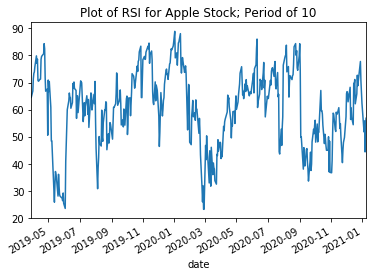

In [8]:
df.RSI.plot(title="Plot of RSI for Apple Stock; Period of 10")

### Modifications to Sentiment Code (In progress)

In [26]:
#Code used for extracting articles


#for i in range(2,20):
#    googlenews.getpage(i)
#    result=googlenews.result(sort=True)
#    df=pd.DataFrame(result)
        
# while article_day_max=np.sum(df['date']!="")<30:
    #run this code

#googlenews=GoogleNews(start='05/01/2020',end='05/31/2020')
#googlenews.search('Coronavirus')
#result=googlenews.result()
#df=pd.DataFrame(result)
#df.head()                                                                                              # printing the DataFrame       
#df.drop(columns=['img','date'],inplace=True)                                                           # these columns are not needed
#df.set_index('datetime')                                                                               # make datetime the index
#df=data_clean(df)      or df.dropna(axis=0)                                                            # removing NA values

#df.dropna(axis=0).sort_index(ascending=True).drop(columns=['date','img']).set_index('datetime')        # single command that does this
#df.index=df.index.values.apply(lambda DATE: datetime.strptime(DATE,"%Y-%m-%d"))                        # converts index entries to datetime objects


#for ind in df.index:                                                                                   # loops through index to collect information
#    master_dictionary.                                                                                 # initializes dictionary to store data
#    try:
#        article = Article(df['link'][ind])                                                             # stores link of article 
#        article.download()                                                                             # extracts file from article
#        article.parse()                                                                                # parses file from article
#        article.nlp()                                                                                  # interprets file from article ?
#        D['Date']=df['date'][ind]
#        D['Media']=df['media'][ind]
#        D['Title']=article.title
#        D['Article']=article.text
#        D['Summary']=article.summary
#        print(D)
#    except:                                                                       # skips over forbidden urls
#        pass
#news_df=pd.DataFrame(L)
#news_df

### Getting Average Beta Values for Specific Stock over a specified period; the default period is 15

In [93]:
beta_df=apple.get_beta()
beta_df

,beta
Date,
2019-03-29,NaN
2019-04-01,NaN
2019-04-02,NaN
2019-04-03,NaN
2019-04-04,NaN
2019-04-05,NaN
2019-04-08,NaN
2019-04-09,NaN
2019-04-10,NaN
